In [4]:
import numpy as np
from parflow.tools.io import read_pfb
import matplotlib.pyplot as plt

In [35]:
cummulative_tr = np.zeros((165, 265))
cummulative_ev = np.zeros((165, 265))
soil_infiltr = np.zeros((165, 265))
for i in range(1, 8761):
    clm_data = read_pfb(f'outputs/Dynamic_Spinup.out.clm_output.{i:05d}.C.pfb')
    cummulative_ev = cummulative_ev + clm_data[4]*3600 # mm/s to mm/hr
    cummulative_tr = cummulative_tr + clm_data[8]*3600 # mm/s to mm/hr
    soil_infiltr = soil_infiltr + clm_data[9]*3600 # mm/s to mm/hr

In [36]:
Mask = np.flip(np.loadtxt('masks/Mask.txt'), axis = 0)
Mask[Mask == 0] = np.nan

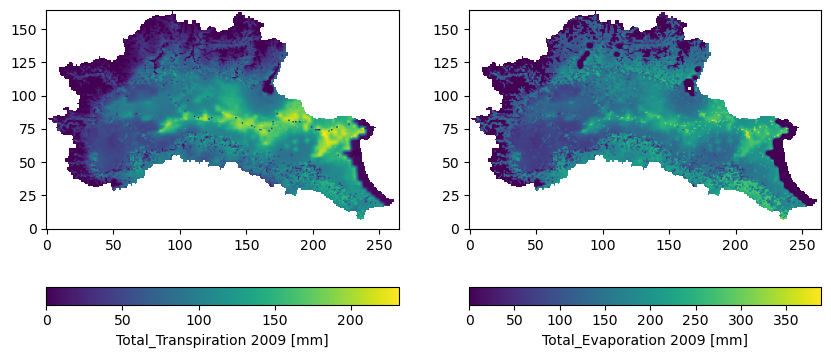

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
im = ax[0].imshow(cummulative_tr*Mask, origin='lower')
plt.colorbar(im, ax=ax[0], orientation='horizontal', label='Total_Transpiration 2009 [mm]')

im = ax[1].imshow(cummulative_ev*Mask, origin='lower', vmin=0)
plt.colorbar(im, ax=ax[1], orientation='horizontal', label='Total_Evaporation 2009 [mm]')

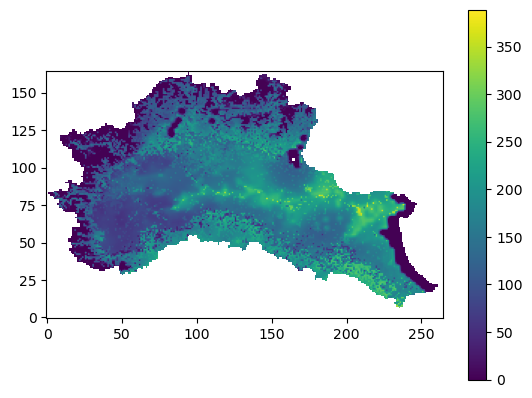

In [49]:
cummulative_ev[cummulative_ev < 0] = 0
plt.imshow(cummulative_ev*Mask, origin='lower')
plt.colorbar()

204.3942566138485

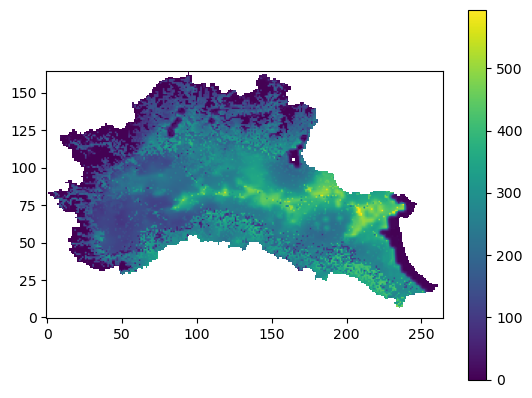

: 

In [51]:
ET = cummulative_ev + cummulative_tr
plt.imshow(ET*Mask, origin='lower')
plt.colorbar()
np.nanmean(ET*Mask)

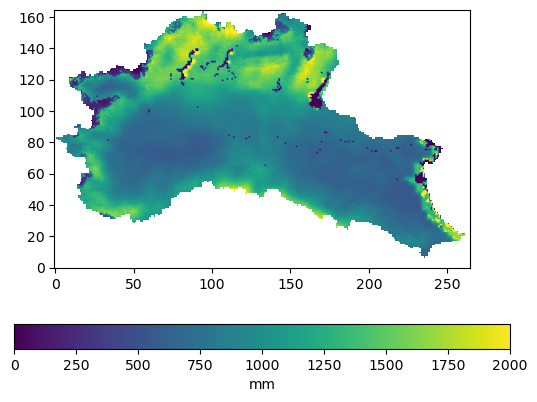

In [34]:
plt.imshow(soil_infiltr*Mask, origin='lower', vmax = 2000)
plt.colorbar(orientation='horizontal', label='mm')

In [32]:
np.nanmean(soil_infiltr*Mask)

972.7476391039174

In [33]:
np.nansum(Mask)

21756.0